In [40]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns


In [41]:
# Paths
train_dir = 'train/train_data'
test_dir = 'test/test_data'

# Check number of images in each set
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len([file for file in files if file.endswith('.jpg')])
    return count

print("Number of training images: ", count_images(train_dir))
print("Number of test images: ", count_images(test_dir))

Number of training images:  0
Number of test images:  0


In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Found 3552 images belonging to 2 classes.
Found 886 images belonging to 2 classes.
Found 1114 images belonging to 2 classes.


In [43]:
# Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])


In [44]:
# Callbacks
early_stopping = EarlyStopping(patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True)

In [45]:
# Training
history = model.fit(
    train_generator,
    epochs=50,
    validation_data=validation_generator,
    callbacks=[early_stopping, model_checkpoint]
)

In [ ]:
# Plot how learning rate affects accuracy
plt.plot(learning_rates, accuracies, marker='o')
plt.title('Learning Rate vs Test Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.xscale('log')  # Set logarithmic scale for learning rates
plt.show()

In [ ]:
# Plot how learning rate affects accuracy
plt.plot(learning_rates, accuracies, marker='o')
plt.title('Learning Rate vs Test Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Test Accuracy')
plt.xscale('log')  # Set logarithmic scale for learning rates
plt.show()

In [ ]:
#Load the best model
model.load_weights('best_model.keras')

In [ ]:
# Evaluation
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')

In [ ]:
# Predictions
predictions = (model.predict(test_generator) > 0.5).astype("int32")

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step


C:\Users\altaa\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:386: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


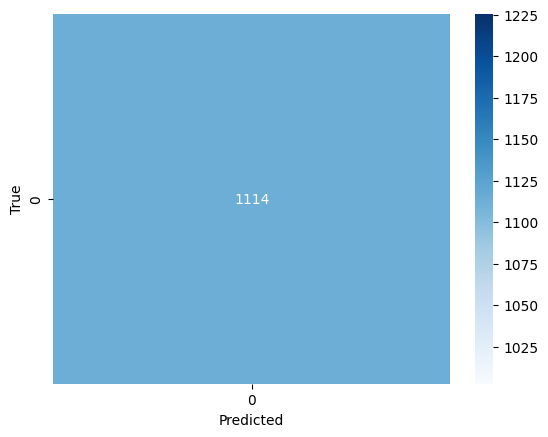

In [ ]:
# Confusion matrix
cm = confusion_matrix(test_generator.classes, predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

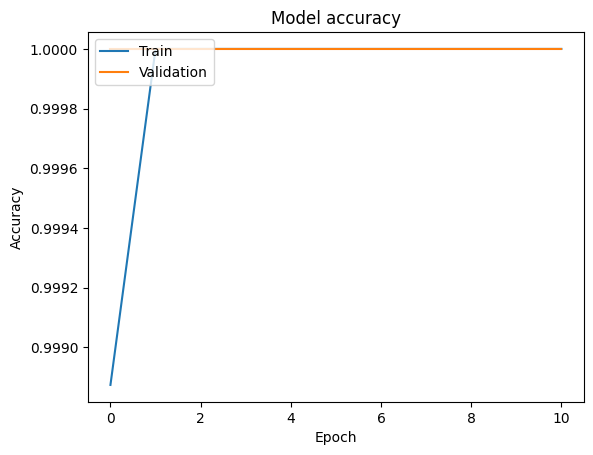

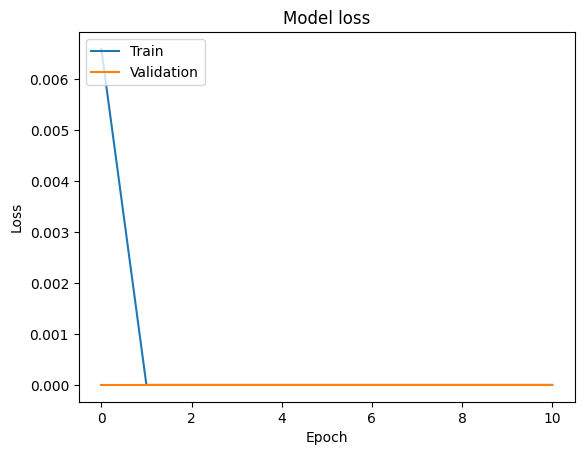

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()